# Dataset Download from Forage BCG X
## https://www.theforage.com/virtual-experience/Tcz8gTtprzAS4xSoK/bcg/data-science-ccdz/business-understanding-hypothesis-framing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
import pandas as pd

data = pd.read_csv("clean_data_after_eda.csv", parse_dates=['date_activ','date_end','date_modif_prod','date_renewal'])
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

## Data Analysis

In [3]:
#Check all columns
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [4]:
# check the information of every column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [5]:
#check for duplicate information
data.duplicated().sum()

0

In [6]:
#check the number of unique values in each column
for i in data.columns:
    print(f"",i,":",data[i].nunique())

 id : 14606
 channel_sales : 8
 cons_12m : 11065
 cons_gas_12m : 2112
 cons_last_month : 4751
 date_activ : 1796
 date_end : 368
 date_modif_prod : 2129
 date_renewal : 386
 forecast_cons_12m : 13993
 forecast_cons_year : 4218
 forecast_discount_energy : 12
 forecast_meter_rent_12m : 3528
 forecast_price_energy_off_peak : 516
 forecast_price_energy_peak : 329
 forecast_price_pow_off_peak : 41
 has_gas : 2
 imp_cons : 7752
 margin_gross_pow_ele : 2391
 margin_net_pow_ele : 2391
 nb_prod_act : 10
 net_margin : 11965
 num_years_antig : 13
 origin_up : 6
 pow_max : 698
 var_year_price_off_peak_var : 4672
 var_year_price_peak_var : 2694
 var_year_price_mid_peak_var : 1893
 var_year_price_off_peak_fix : 885
 var_year_price_peak_fix : 379
 var_year_price_mid_peak_fix : 374
 var_year_price_off_peak : 5765
 var_year_price_peak : 2936
 var_year_price_mid_peak : 2145
 var_6m_price_off_peak_var : 2401
 var_6m_price_peak_var : 1412
 var_6m_price_mid_peak_var : 873
 var_6m_price_off_peak_fix : 257
 

In [7]:
data.date_activ

0       2013-06-15
1       2009-08-21
2       2010-04-16
3       2010-03-30
4       2010-01-13
           ...    
14601   2012-05-24
14602   2012-08-27
14603   2012-02-08
14604   2012-08-30
14605   2009-12-18
Name: date_activ, Length: 14606, dtype: datetime64[ns]

In [8]:
# create a function to plot the information of every data column based on the year price variable
def create_dataframe_plot(search, data_support):
    
    data = pd.DataFrame({
        'data': data_support[search],
        'var_year_price_off_peak': data_support['var_year_price_off_peak'],
        'var_year_price_peak': data_support['var_year_price_peak'],
        'var_year_price_mid_peak': data_support['var_year_price_mid_peak']
    })
    
    data.sort_values(by='data', ascending=True, inplace=True)
    
    # Set the 'data' column as the index
    data.set_index('data', inplace=True)

    
    data.plot(figsize=(10,7))
    plt.title(search)

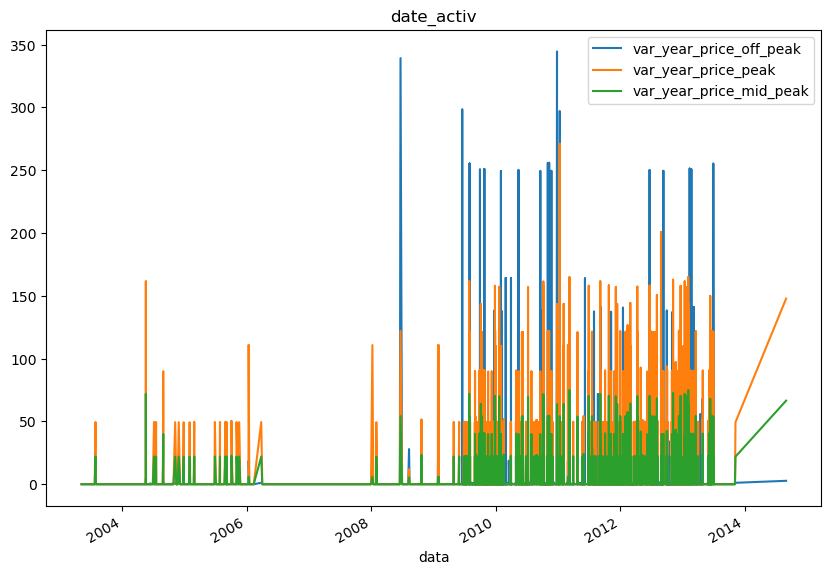

In [9]:
create_dataframe_plot(search='date_activ', data_support=data)

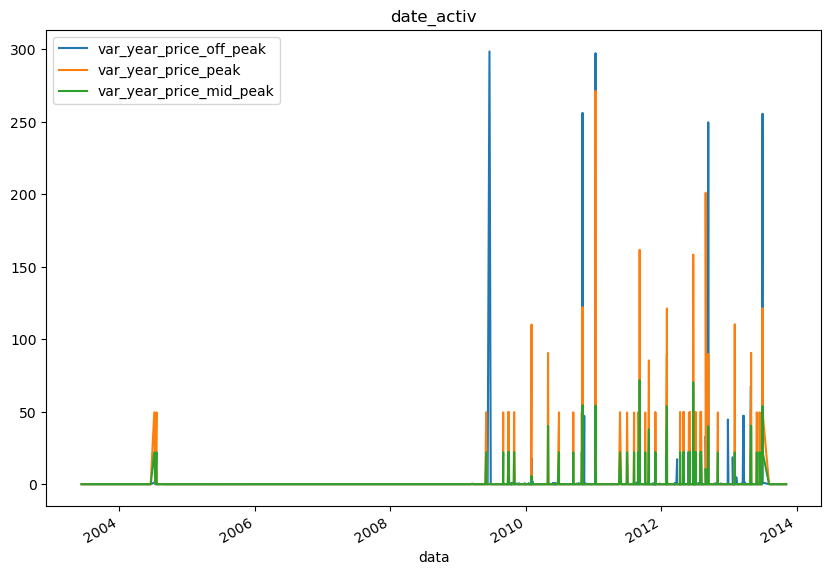

In [10]:
data_churm = data[data['churn']==1]
create_dataframe_plot(search='date_activ', data_support=data_churm)

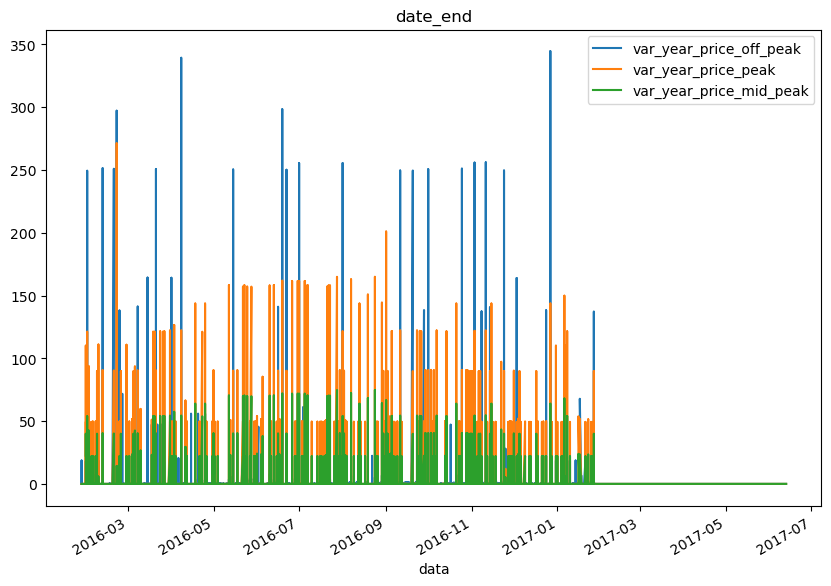

In [11]:
create_dataframe_plot(search='date_end', data_support=data)

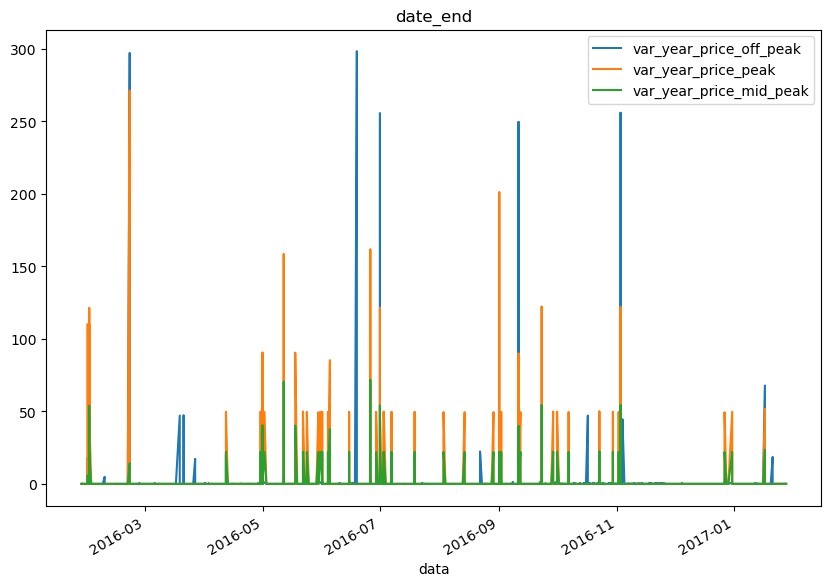

In [12]:
create_dataframe_plot(search='date_end', data_support=data_churm)

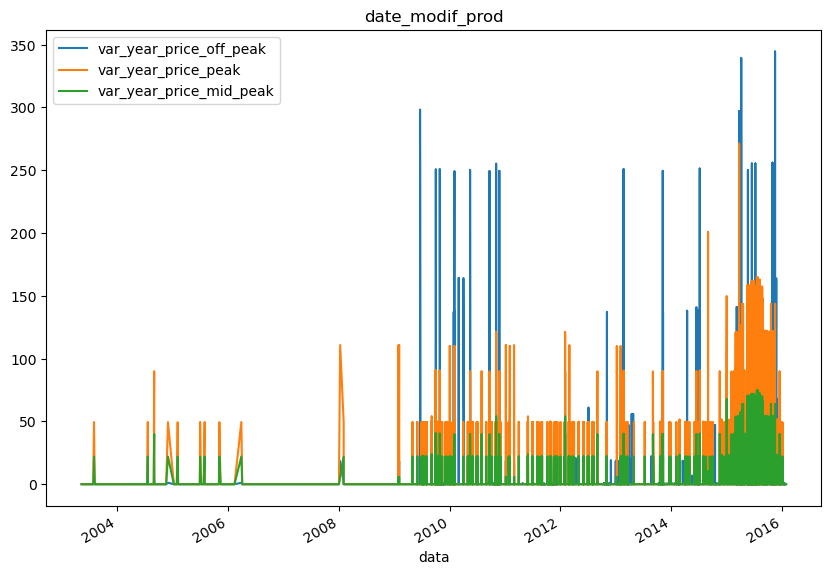

In [13]:
create_dataframe_plot(search='date_modif_prod', data_support=data)

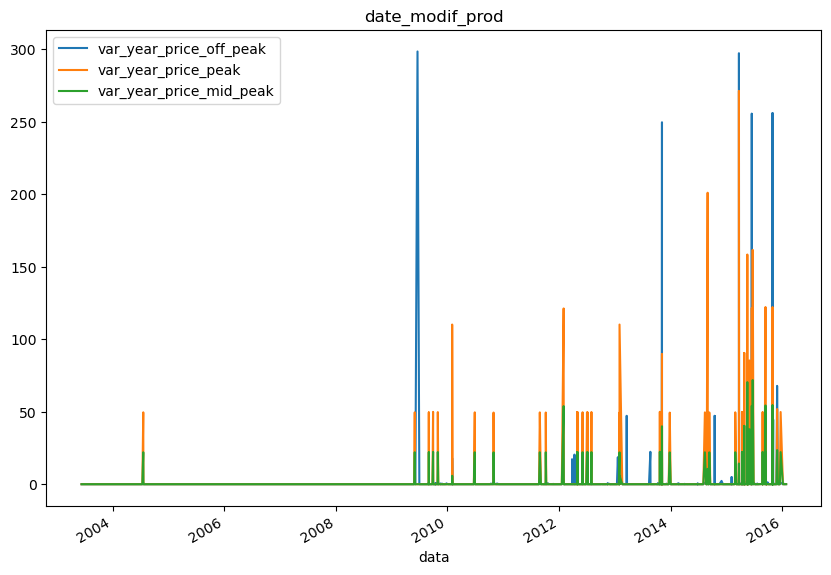

In [14]:
create_dataframe_plot(search='date_modif_prod', data_support=data_churm)

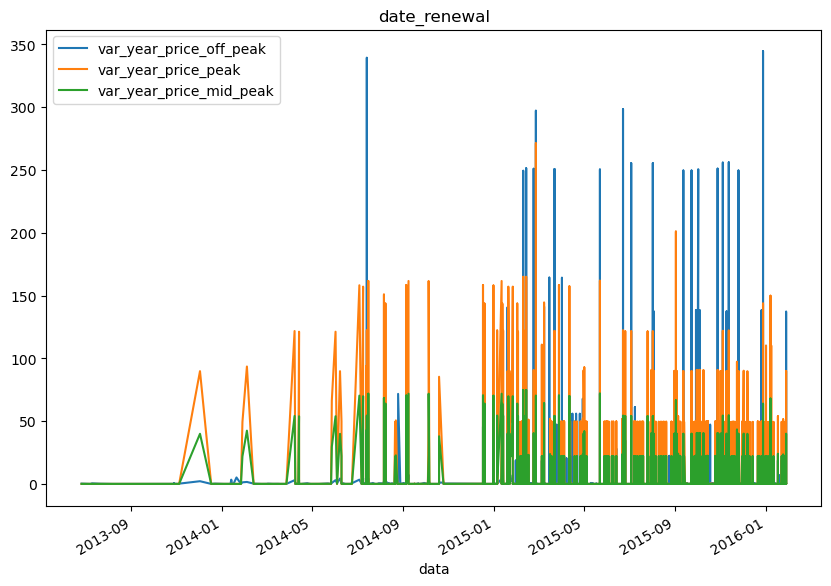

In [15]:
create_dataframe_plot(search='date_renewal', data_support=data)

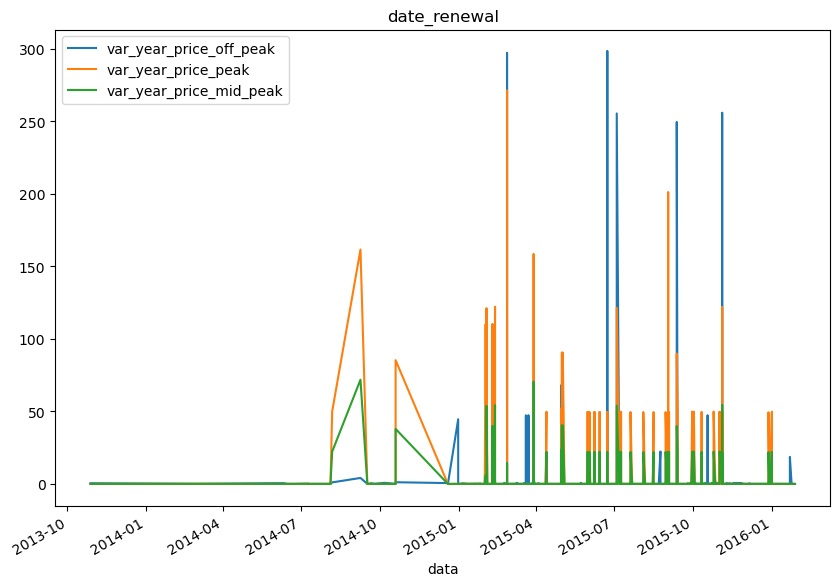

In [16]:
create_dataframe_plot(search='date_renewal', data_support=data_churm)

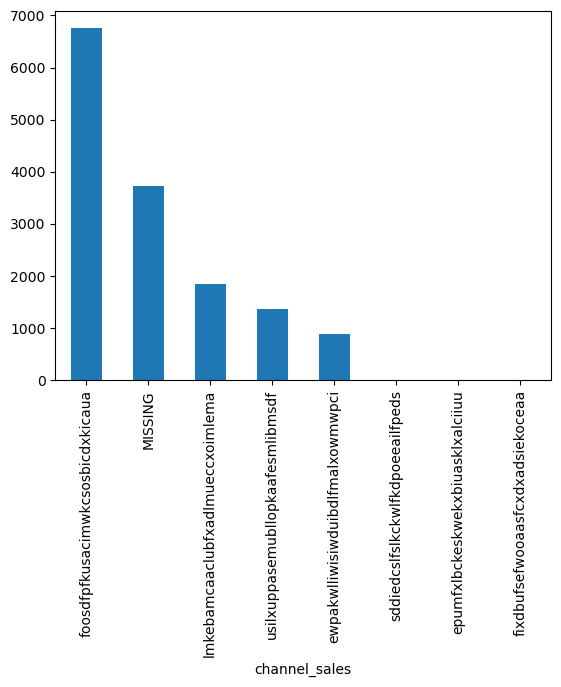

In [17]:
#check the frequency of each channel sales
data.channel_sales.value_counts().plot(kind="bar");

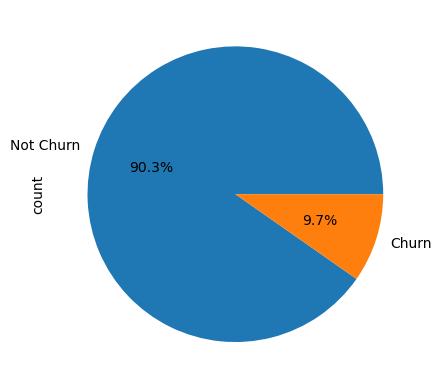

In [18]:
#check data balance. We can see that 1 of 10 people is charming
data.churn.value_counts().plot(kind='pie', labels=['Not Churn','Churn'], autopct='%1.1f%%');

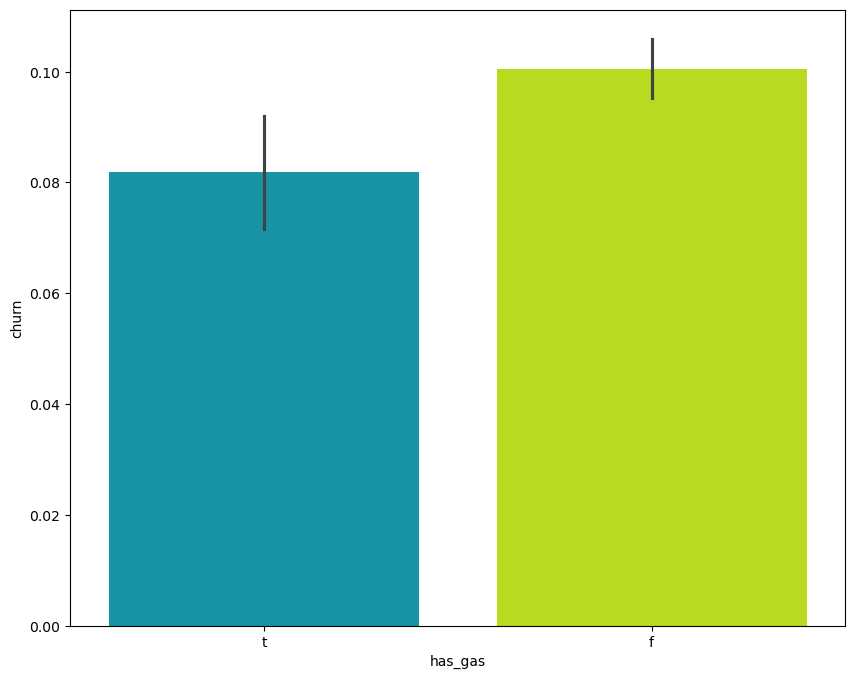

In [19]:
# check the number of people charming based on gas methods
plt.figure(figsize = (10,8))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = data["has_gas"], y = data["churn"], palette = "nipy_spectral");

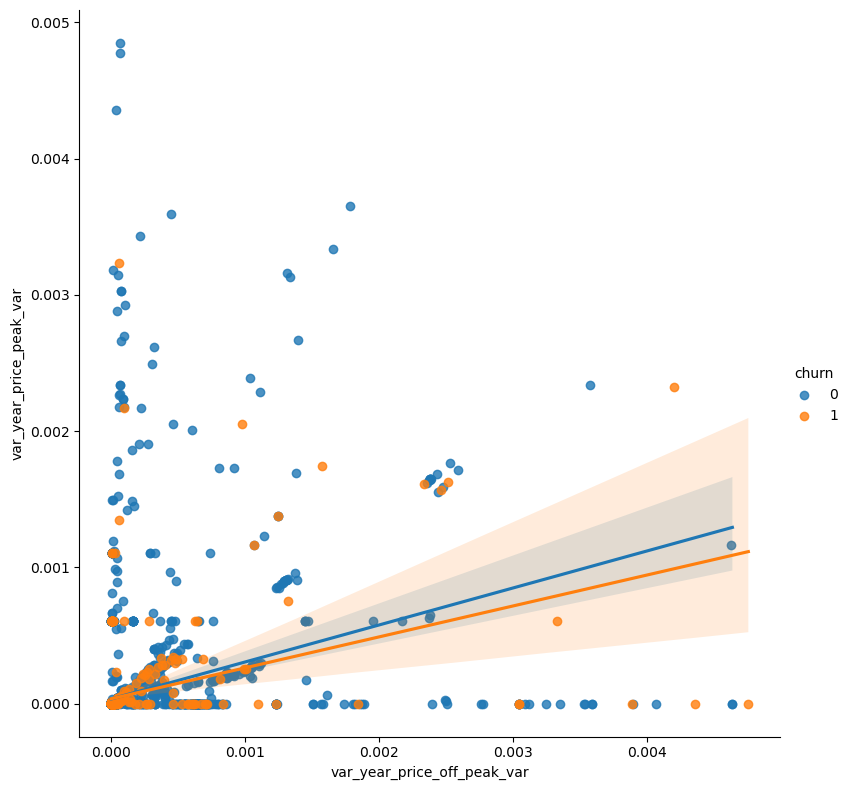

In [20]:
# Check the churm based on price off peak and when it is on peak
sns.lmplot(data=data,x="var_year_price_off_peak_var", y="var_year_price_peak_var", hue="churn",height=8, legend=True);

In [21]:
#check the number of unique values on Channel Sales variable
data.channel_sales.value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [22]:
#check the number of unique values on has gas variable
data.has_gas.value_counts()

has_gas
f    11955
t     2651
Name: count, dtype: int64

In [23]:
#check the number of unique values on origin_up variable
data.origin_up.value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [24]:
#transform the categorical data from specific columns to numeric 
from sklearn.preprocessing import OrdinalEncoder

object_list = ['origin_up','has_gas','channel_sales']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99).fit(data[object_list])
data[object_list] = encoder.transform(data[object_list])

In [25]:
#drop all others categorical variable
for i in data.columns:
    if data[i].dtype == "object":
        data.drop(i, axis=1, inplace=True)

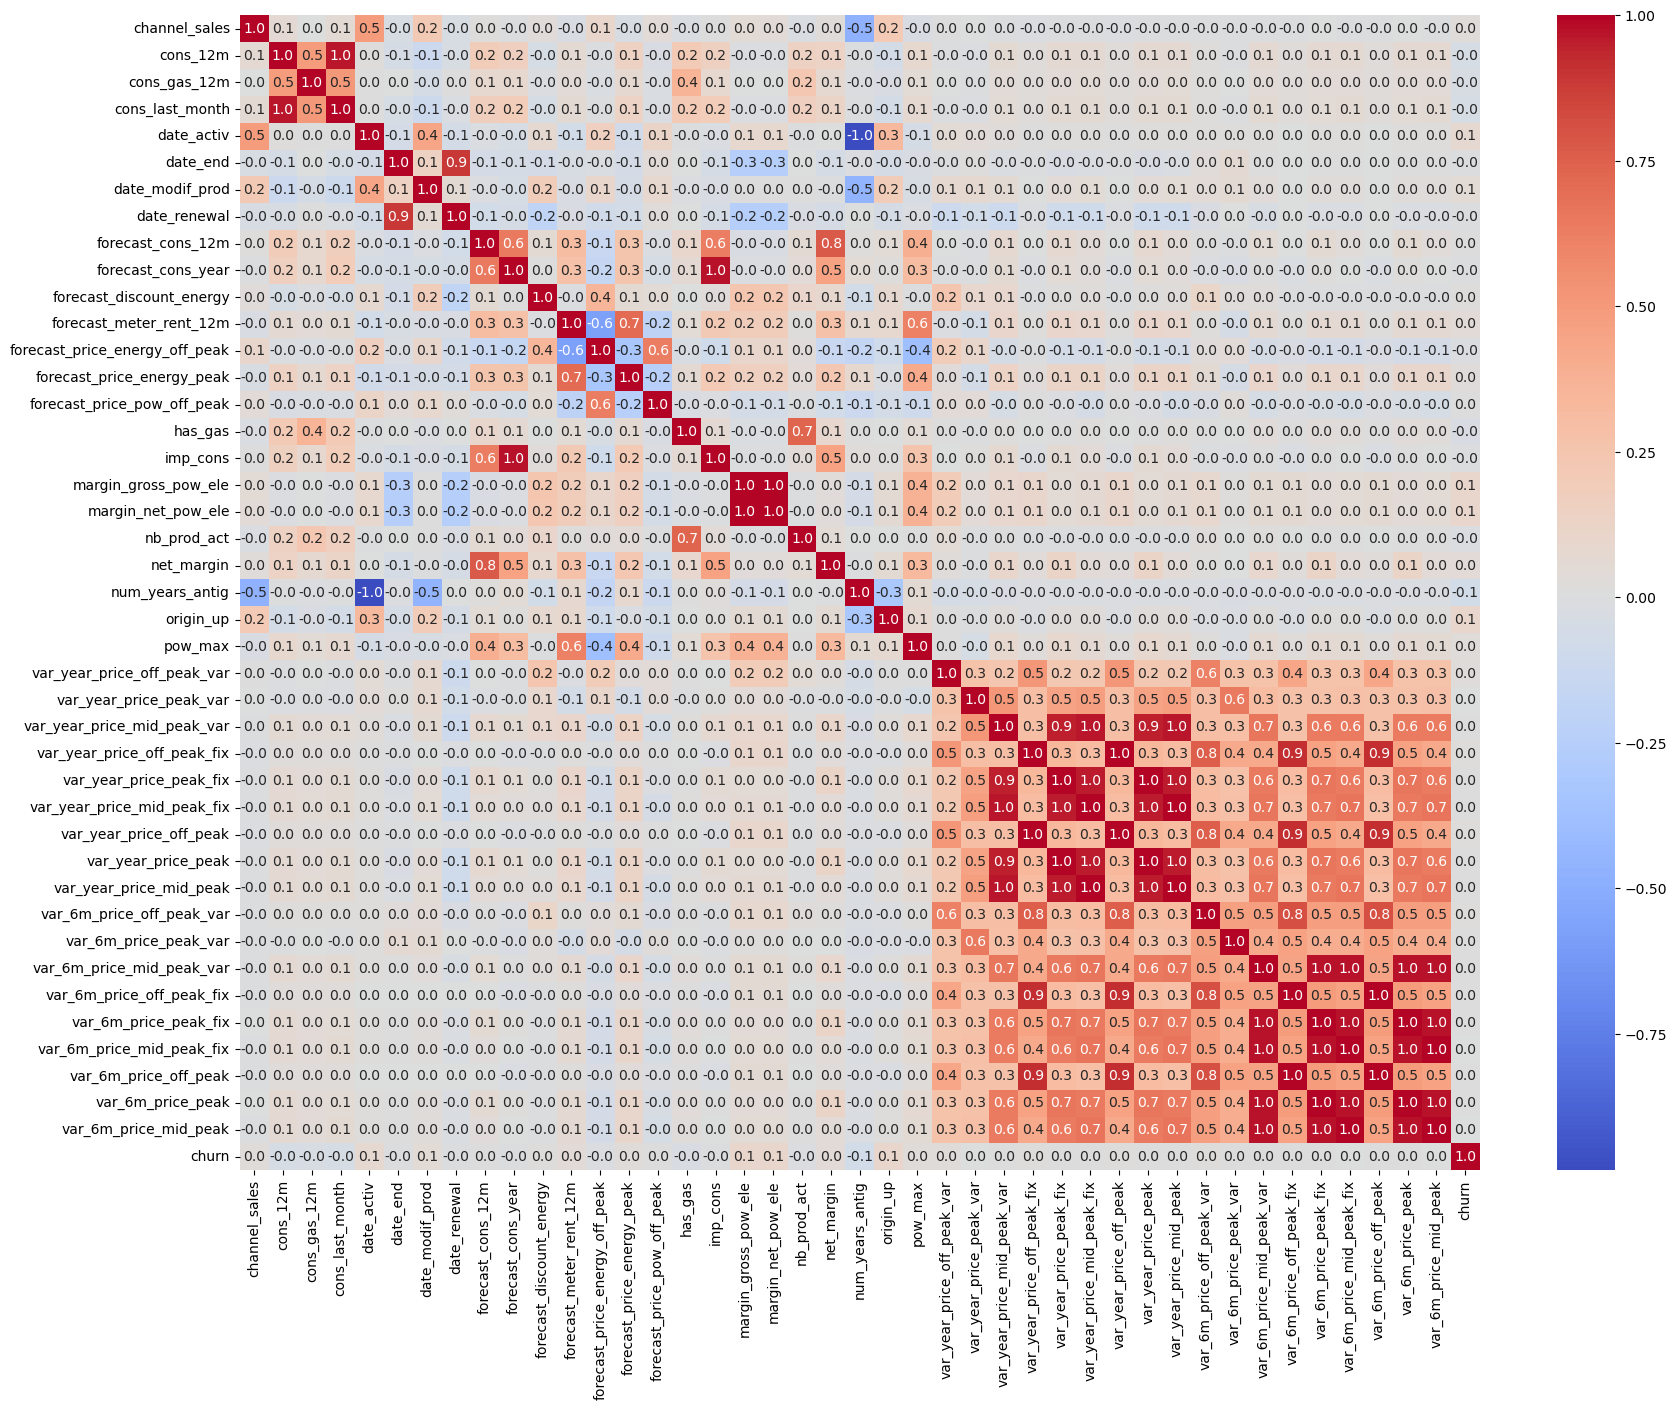

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',fmt=".1f")
plt.show()

In [27]:
#suffle data so it can become well balanced for machine learning
data_shuffled = data.sample(frac=1).reset_index(drop=True)

In [28]:
#separate the target variable from the others
X = data_shuffled.drop("churn", axis=1)
y = data_shuffled["churn"]

In [29]:
X.describe()

channel_sales      cons_12m  cons_gas_12m  cons_last_month  \
count   14606.000000  1.460600e+04  1.460600e+04     14606.000000   
mean        3.266945  1.592203e+05  2.809238e+04     16090.269752   
min         0.000000  0.000000e+00  0.000000e+00         0.000000   
25%         0.000000  5.674750e+03  0.000000e+00         0.000000   
50%         4.000000  1.411550e+04  0.000000e+00       792.500000   
75%         4.000000  4.076375e+04  0.000000e+00      3383.000000   
max         7.000000  6.207104e+06  4.154590e+06    771203.000000   
std         2.183223  5.734653e+05  1.629731e+05     64364.196422   

                          date_activ                       date_end  \
count                          14606                          14606   
mean   2011-01-28 07:54:18.879912448  2016-07-27 20:48:26.422018560   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 06:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00            2016-10-31 00:00:00   
max              2014-09-01 00:00:00            2017-06-13 00:00:00   
std                              NaN                            NaN   

                     date_modif_prod                   date_renewal  \
count                          14606                          14606   
mean   2013-01-02 12:29:10.951663616  2015-07-21 06:59:00.353279488   
min              2003-05-09 00:00:00            2013-06-26 00:00:00   
25%              2010-08-12 00:00:00            2015-04-17 00:00:00   
50%              2013-06-19 00:00:00            2015-07-27 00:00:00   
75%              2015-06-16 00:00:00            2015-10-29 00:00:00   
max              2016-01-29 00:00:00            2016-01-28 00:00:00   
std                              NaN                            NaN   

       forecast_cons_12m  forecast_cons_year  ...  var_year_price_mid_peak  \
count       14606.000000        14606.000000  ...             14606.000000   
mean         1868.614880         1399.762906  ...                 0.885995   
min             0.000000            0.000000  ...                 0.000000   
25%           494.995000            0.000000  ...                 0.000000   
50%          1112.875000          314.000000  ...                 0.000000   
75%          2401.790000         1745.750000  ...                 0.000645   
max         82902.830000       175375.000000  ...                74.763759   
std          2387.571531         3247.786255  ...                 5.698312   

       var_6m_price_off_peak_var  var_6m_price_peak_var  \
count               14606.000000           1.460600e+04   
mean                    0.000025           3.304264e-05   
min                     0.000000           0.000000e+00   
25%                     0.000003           0.000000e+00   
50%                     0.000004           9.450150e-08   
75%                     0.000011           2.896760e-06   
max                     0.005543           4.791197e-03   
std                     0.000204           2.231791e-04   

       var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
count               1.460600e+04               14606.000000   
mean                1.406015e-05                   0.922810   
min                 0.000000e+00                   0.000000   
25%                 0.000000e+00                   0.000000   
50%                 0.000000e+00                   0.000000   
75%                 4.860000e-10                   0.007962   
max                 2.415288e-03                 525.988881   
std                 1.273170e-04                  18.218286   

       var_6m_price_peak_fix  var_6m_price_mid_peak_fix  \
count           14606.000000               14606.000000   
mean                1.460247                   0.634413   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%    

In [30]:
#drop the data variables so we can normalize the data
X.drop(['date_activ','date_end','date_modif_prod','date_renewal'], axis=1, inplace=True)

In [31]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaler = scaler.fit_transform(X)

In [32]:
#devide into train_validation_test
X_train, y_train = X[:8764], y[:8764]
X_val, y_val = X[8764:11685], y[8764:11685]
X_test, y_test = X[11685:], y[11685:]

In [33]:
#check the size of train and test
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8764, 38), (8764,), (2921, 38), (2921,), (2921, 38), (2921,))

In [34]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "KNClassifier": KNeighborsClassifier()}

In [35]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [36]:

%%time 
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

CPU times: total: 16.1 s
Wall time: 7.35 s


{'Logistic Regression': 0.9024306744265662,
 'KNN': 0.9010612803834304,
 'Random Forest': 0.905511811023622,
 'XGBoost': 0.9034577199589182,
 'Gradient Boost Classifier': 0.9027730229373502,
 'Decision Tree Classifier': 0.8298527901403628,
 'KNClassifier': 0.9010612803834304}

In [37]:
# use the best model to predict the test data
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RFC_Prediction= model_RFC.predict(X_test)

In [38]:
RFC_Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Use the Sklearn to check the metrics ( confusion matrix, precision, recall, f1 and accuracy)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Confusion Matrix\n', confusion_matrix(y_test,RFC_Prediction))

print("\n",classification_report(y_test,RFC_Prediction))

RFC_acc = accuracy_score(y_test,RFC_Prediction)
print(f"The accuracy is:",RFC_acc)

Confusion Matrix
 [[2624    2]
 [ 279   16]]

               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2626
           1       0.89      0.05      0.10       295

    accuracy                           0.90      2921
   macro avg       0.90      0.53      0.53      2921
weighted avg       0.90      0.90      0.86      2921

The accuracy is: 0.9038000684697022


In [40]:
print('''How can we improve?

1 - we can try to balance the data by using SMOTE or get more information with the company
2 - we can improve model hyperparameter with RandomSearchingCV
3 - we can reduce the number of variable and select the variable with more correlation.''')

How can we improve?

1 - we can try to balance the data by using SMOTE or get more information with the company
2 - we can improve model hyperparameter with RandomSearchingCV
3 - we can reduce the number of variable and select the variable with more correlation.
